Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable.
Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)
Data Set : https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not.
a.       Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.
b.      Perform data-preparation (Train-Test Split)
c.       Apply Machine Learning Algorithm
d.      Evaluate Model.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,r2_score,fbeta_score,classification_report

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Admission_Predict.csv to Admission_Predict.csv


In [4]:
df=pd.read_csv('Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
df['Chance of Admit ']=[np.round(i) for i in df['Chance of Admit ']]

In [9]:
df=df.drop(columns=['Serial No.'])

In [10]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,1.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,1.0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1.0
396,325,107,3,3.0,3.5,9.11,1,1.0
397,330,116,4,5.0,4.5,9.45,1,1.0
398,312,103,3,3.5,4.0,8.78,0,1.0


In [11]:
x=df[['GRE Score','CGPA']]

In [12]:
y=df['Chance of Admit ']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=2
)

In [14]:
x.shape

(400, 2)

In [15]:
scaler=StandardScaler()

In [16]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale =scaler.fit_transform(x_test)

In [17]:
x_train_scale

array([[ 1.09170234,  1.45628803],
       [-0.05006197,  0.69862315],
       [-0.57703012, -2.16366641],
       [-1.10399826,  0.09249124],
       [-0.22571802, -0.04220474],
       [-1.19182629,  0.10932824],
       [ 0.82821827,  0.86699312],
       [ 1.09170234,  0.9680151 ],
       [ 1.26735839,  1.33842905],
       [ 0.65256222,  0.3450462 ],
       [-1.63096641, -1.18712056],
       [-1.45531036, -0.71568464],
       [ 0.30125012,  0.05881724],
       [ 0.30125012,  1.03536309],
       [-0.75268617, -0.16006372],
       [ 0.30125012,  0.47974218],
       [ 0.5647342 ,  0.49657918],
       [ 0.30125012, -0.41261868],
       [ 1.88215456,  1.08587409],
       [ 0.74039024, -0.3115967 ],
       [-1.36748234, -0.41261868],
       [-1.36748234, -0.78303263],
       [-0.05006197, -0.44629268],
       [ 0.74039024,  0.69862315],
       [-0.05006197, -1.94478545],
       [-0.05006197,  0.29453521],
       [-0.31354605,  0.17667623],
       [ 1.53084246,  1.607821  ],
       [-0.22571802,

In [18]:
decision=DecisionTreeClassifier()

In [19]:
decision.fit(x_train_scale,y_train
             )

DecisionTreeClassifier()

In [20]:
decision_y_pred= decision.predict(x_test_scale)


[Text(0.3317307692307692, 0.9583333333333334, 'x[1] <= -1.406\ngini = 0.175\nsamples = 300\nvalue = [29, 271]'),
 Text(0.07692307692307693, 0.875, 'x[0] <= -1.367\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(0.20432692307692307, 0.9166666666666667, 'True  '),
 Text(0.038461538461538464, 0.7916666666666666, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.11538461538461539, 0.7916666666666666, 'x[1] <= -1.566\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.07692307692307693, 0.7083333333333334, 'x[0] <= -0.182\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.038461538461538464, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.11538461538461539, 0.625, 'x[1] <= -1.97\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.07692307692307693, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15384615384615385, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.15384615384615385, 0.7083333333333334, 'gini = 0.0\nsa

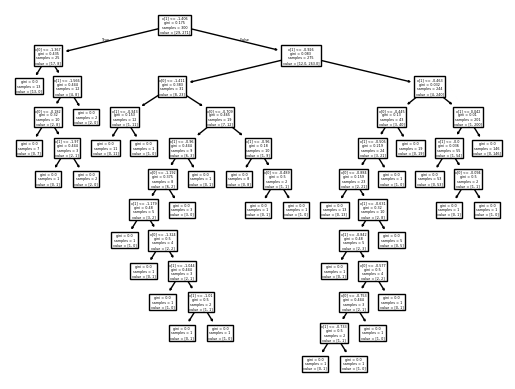

In [33]:
plot_tree(decision)

In [21]:
decision_y_pred


array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [29]:
plt.figure(figsize = (200,100))
tree=plot_tree(
    decision_tree = decision,
    feature_names=df.columns,
    class_names =['0','1'],
    filled=True
)

Output hidden; open in https://colab.research.google.com to view.

In [32]:
plt.figure(figsize=(200,100))
tree=plot_tree(
    decision_tree=decision,
    feature_names =df.columns,
    class_names=['0','1'],
    filled=True
)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
print('confusion matrix',confusion_matrix(y_test,decision_y_pred
))

confusion matrix [[ 1  5]
 [10 84]]
